In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ALLerrordataset.csv')
df.head()

,statuscode,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,cachecontrol,...,devicebrand,host,method,manifest,assetnumber,hit,@version,cachename,popname,uid
0,404,NaN,HTTP/1.1,0.000000,0.069129,0.069188,NaN,0.0,3815.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
1,404,NaN,HTTP/1.1,0.000000,0.077291,0.077333,NaN,0.0,3320.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
2,404,application/octet-stream,HTTP/1.1,0.206349,0.049394,0.049450,3600.0,0.0,4170.0,Cache-Control:max-age=3600,...,NaN,13.0,GET,False,NaN,miss,1,0,0,NaN
3,404,NaN,HTTP/1.1,0.000000,0.069060,0.069112,NaN,3.0,4518.0,Cache-Control:,...,1.0,0.0,GET,False,NaN,miss,1,0,0,NaN
4,404,NaN,HTTP/1.1,0.000000,0.104557,0.104600,NaN,0.0,4727.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN


In [3]:
df=df.drop(labels=["fragment","manifest","hit","@version","popname"],axis=1)

In [4]:
df=df.drop(labels=["timefirstbyte","contentlength","timetoserv","maxage","sid"],axis=1)

In [5]:
df=df.drop(labels=["path","@timestamp","uid"],axis=1)

In [6]:
df_livetv = df[df['host'] == 7]

In [7]:
df_livetv.head()

,statuscode,contenttype,protocol,osfamily,cachecontrol,uamajor,uafamily,devicefamily,contentpackage,coordinates,livechannel,devicemodel,devicebrand,host,method,assetnumber,cachename
70,400,text/html; charset=utf-8,HTTP/1.1,0.0,Cache-Control:,NaN,12.0,0.0,NaN,2031.0,NaN,NaN,NaN,7.0,GET,NaN,0
73,400,text/html; charset=utf-8,HTTP/1.1,0.0,Cache-Control:,NaN,12.0,0.0,NaN,58.0,NaN,NaN,NaN,7.0,GET,NaN,0
74,400,text/html; charset=utf-8,HTTP/1.1,0.0,Cache-Control:,NaN,12.0,0.0,NaN,649.0,NaN,NaN,NaN,7.0,GET,NaN,0
75,400,text/html; charset=utf-8,HTTP/1.1,0.0,Cache-Control:,NaN,12.0,0.0,NaN,0.0,NaN,NaN,NaN,7.0,GET,NaN,0
79,412,text/html,HTTP/1.1,0.0,Cache-Control:,NaN,12.0,0.0,NaN,4121.0,60.0,NaN,NaN,7.0,GET,NaN,0


In [8]:
df_livetv=df_livetv.drop(labels=["contentpackage","devicemodel","devicebrand", "assetnumber"],axis=1)

In [9]:
df_livetv=df_livetv.drop(labels=["cachecontrol"],axis=1)

In [10]:
df_livetv=df_livetv.drop(labels=["uamajor"],axis=1)

In [11]:
df_livetv.head()

,statuscode,contenttype,protocol,osfamily,uafamily,devicefamily,coordinates,livechannel,host,method,cachename
70,400,text/html; charset=utf-8,HTTP/1.1,0.0,12.0,0.0,2031.0,NaN,7.0,GET,0
73,400,text/html; charset=utf-8,HTTP/1.1,0.0,12.0,0.0,58.0,NaN,7.0,GET,0
74,400,text/html; charset=utf-8,HTTP/1.1,0.0,12.0,0.0,649.0,NaN,7.0,GET,0
75,400,text/html; charset=utf-8,HTTP/1.1,0.0,12.0,0.0,0.0,NaN,7.0,GET,0
79,412,text/html,HTTP/1.1,0.0,12.0,0.0,4121.0,60.0,7.0,GET,0


In [12]:
df_livetv=df_livetv.drop(labels=["devicefamily","host","method", "cachename"],axis=1)

In [13]:
df_livetv=df_livetv.drop(labels=["protocol","osfamily"],axis=1)

In [14]:
df_livetv.head()

,statuscode,contenttype,uafamily,coordinates,livechannel
70,400,text/html; charset=utf-8,12.0,2031.0,NaN
73,400,text/html; charset=utf-8,12.0,58.0,NaN
74,400,text/html; charset=utf-8,12.0,649.0,NaN
75,400,text/html; charset=utf-8,12.0,0.0,NaN
79,412,text/html,12.0,4121.0,60.0


In [15]:
df_livetv.contenttype.value_counts().sort_values()

text/html                   14983
text/html; charset=utf-8    27605
Name: contenttype, dtype: int64

In [16]:
df_livetv.statuscode.value_counts().sort_values()

403       16
503      173
404     1066
412    14983
400    27432
Name: statuscode, dtype: int64

In [17]:
df_livetv.uafamily.value_counts().sort_values()

3.0         2
23.0        2
1.0        13
12.0    38881
Name: uafamily, dtype: int64

In [18]:
df_livetv.livechannel.value_counts().sort_values()

86.0        7
59.0       26
57.0       78
58.0      129
82.0      169
68.0      843
60.0    14986
Name: livechannel, dtype: int64

In [19]:
df_livetv['uafamily']=df_livetv['uafamily'].fillna(df_livetv['uafamily'].mode()[0])
df_livetv['livechannel']=df_livetv['livechannel'].fillna(df_livetv['livechannel'].mode()[0])

In [20]:
df_livetv.head()

,statuscode,contenttype,uafamily,coordinates,livechannel
70,400,text/html; charset=utf-8,12.0,2031.0,60.0
73,400,text/html; charset=utf-8,12.0,58.0,60.0
74,400,text/html; charset=utf-8,12.0,649.0,60.0
75,400,text/html; charset=utf-8,12.0,0.0,60.0
79,412,text/html,12.0,4121.0,60.0


In [21]:
m = df_livetv.loc[:, df_livetv.columns != "statuscode"]

In [22]:
n = df_livetv.copy()

In [50]:
u = df_livetv.iloc[:,:1]

In [66]:
u.head()

,statuscode
70,0
73,0
74,0
75,0
79,3


In [63]:
u["statuscode"].replace({"400":"0", "403":"1", "404":"2", "412":"3", "503":"4"}, inplace = True)

C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [65]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
u['statuscode']= le.fit_transform(u['statuscode'])

C:\Users\Ajinkya Waghulikar\AppData\Local\Temp/ipykernel_15440/760033222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u['statuscode']= le.fit_transform(u['statuscode'])


In [23]:
m.head()

,contenttype,uafamily,coordinates,livechannel
70,text/html; charset=utf-8,12.0,2031.0,60.0
73,text/html; charset=utf-8,12.0,58.0,60.0
74,text/html; charset=utf-8,12.0,649.0,60.0
75,text/html; charset=utf-8,12.0,0.0,60.0
79,text/html,12.0,4121.0,60.0


In [24]:
n.head()

,statuscode,contenttype,uafamily,coordinates,livechannel
70,400,text/html; charset=utf-8,12.0,2031.0,60.0
73,400,text/html; charset=utf-8,12.0,58.0,60.0
74,400,text/html; charset=utf-8,12.0,649.0,60.0
75,400,text/html; charset=utf-8,12.0,0.0,60.0
79,412,text/html,12.0,4121.0,60.0


In [25]:
n_1 = pd.get_dummies(n, columns = ['statuscode', 'contenttype', 'uafamily', 'livechannel'])
print(n_1)

        coordinates  statuscode_400  statuscode_403  statuscode_404  \
70           2031.0               1               0               0   
73             58.0               1               0               0   
74            649.0               1               0               0   
75              0.0               1               0               0   
79           4121.0               0               0               0   
...             ...             ...             ...             ...   
286966        233.0               1               0               0   
286967       6645.0               0               0               0   
286968       1089.0               1               0               0   
286973        333.0               1               0               0   
286974        499.0               0               0               0   

        statuscode_412  statuscode_503  contenttype_text/html  \
70                   0               0                      0   
73               

In [26]:
m_1 = pd.get_dummies(m, columns = ['contenttype', 'uafamily', 'livechannel'])
print(m_1)

        coordinates  contenttype_text/html  \
70           2031.0                      0   
73             58.0                      0   
74            649.0                      0   
75              0.0                      0   
79           4121.0                      1   
...             ...                    ...   
286966        233.0                      0   
286967       6645.0                      1   
286968       1089.0                      0   
286973        333.0                      0   
286974        499.0                      1   

        contenttype_text/html; charset=utf-8  uafamily_1.0  uafamily_3.0  \
70                                         1             0             0   
73                                         1             0             0   
74                                         1             0             0   
75                                         1             0             0   
79                                         0             0         

In [27]:
cols = m_1.columns


In [28]:
cols1 = n_1.columns

In [29]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

m_1 = ms.fit_transform(m_1)


In [30]:
n_1 = ms.fit_transform(n_1)

In [31]:
m_1 = pd.DataFrame(m_1, columns=[cols])

In [32]:
n_1 = pd.DataFrame(n_1, columns=[cols1])

In [33]:
n_1.head()

,coordinates,statuscode_400,statuscode_403,statuscode_404,statuscode_412,statuscode_503,contenttype_text/html,contenttype_text/html; charset=utf-8,uafamily_1.0,uafamily_3.0,uafamily_12.0,uafamily_23.0,livechannel_57.0,livechannel_58.0,livechannel_59.0,livechannel_60.0,livechannel_68.0,livechannel_82.0,livechannel_86.0
0,0.104197,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.002976,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.033296,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.211420,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


For 3 clusters the average silhouette_score is : 0.9497648892718519
For 4 clusters the average silhouette_score is : 0.9566933579759928
For 5 clusters the average silhouette_score is : 0.9579986376548655
For 6 clusters the average silhouette_score is : 0.8337685053137481
For 7 clusters the average silhouette_score is : 0.8356205166947461


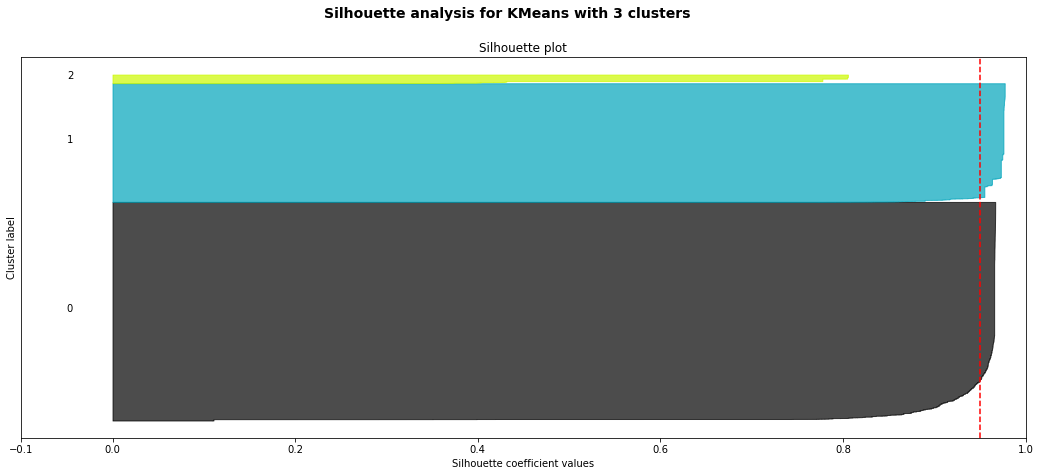

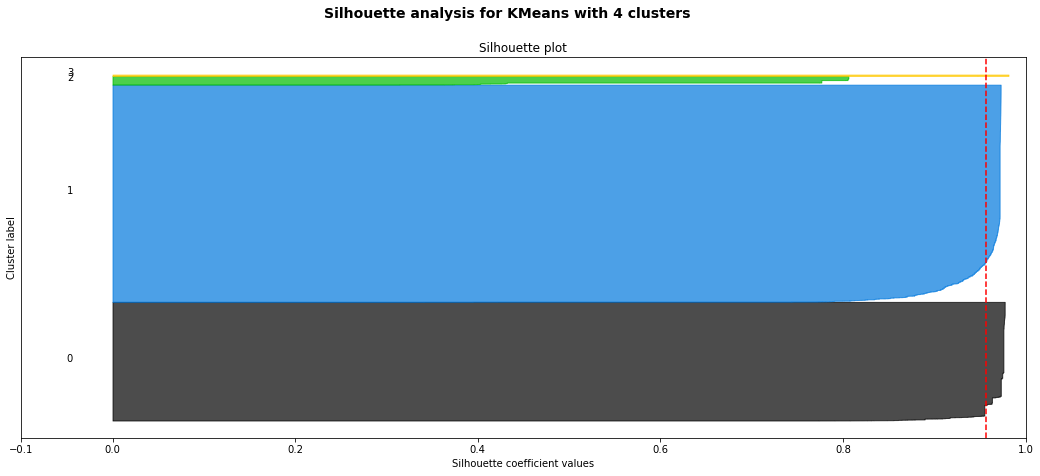

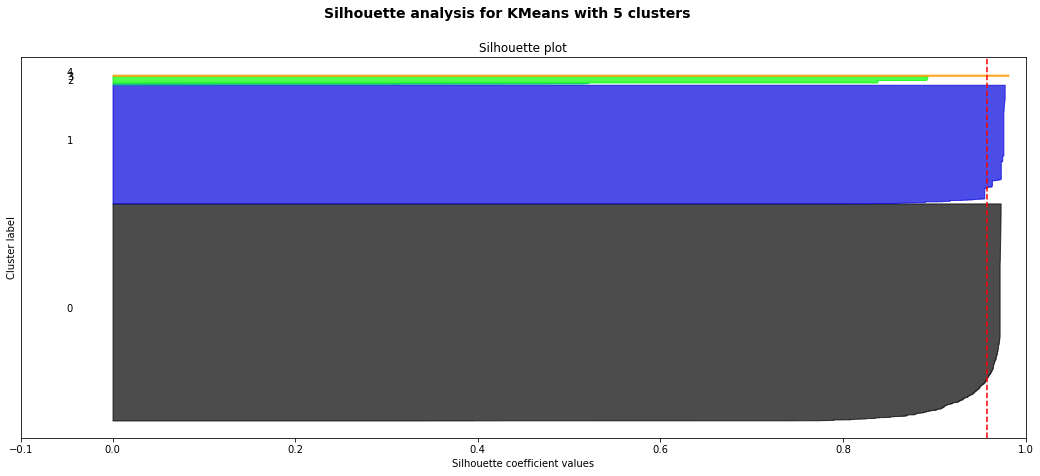

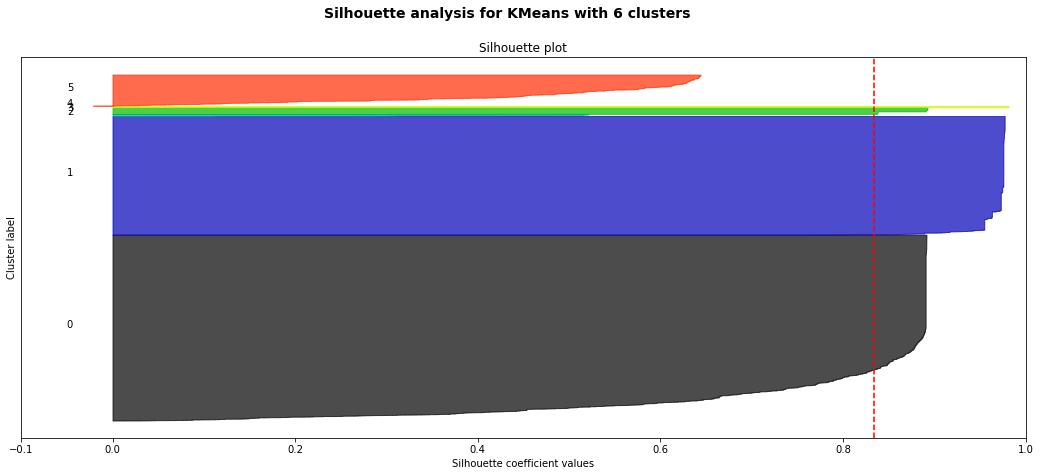

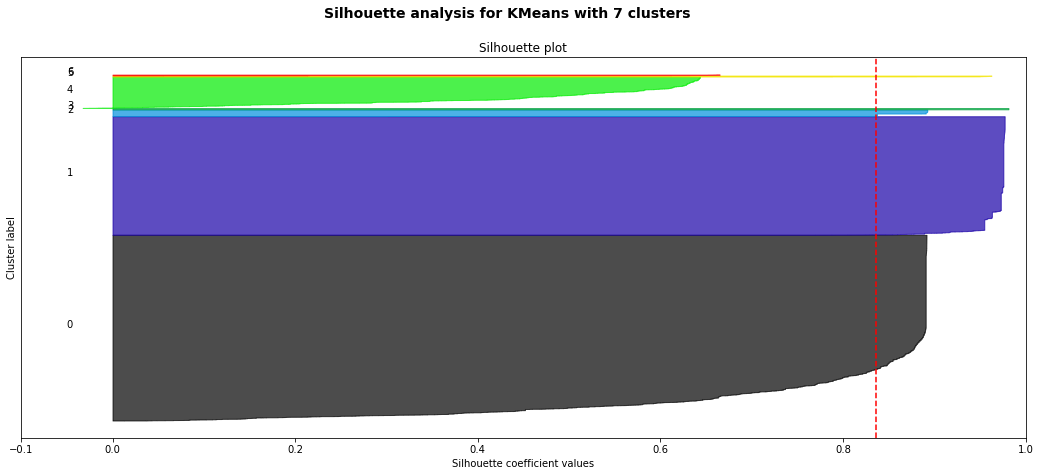

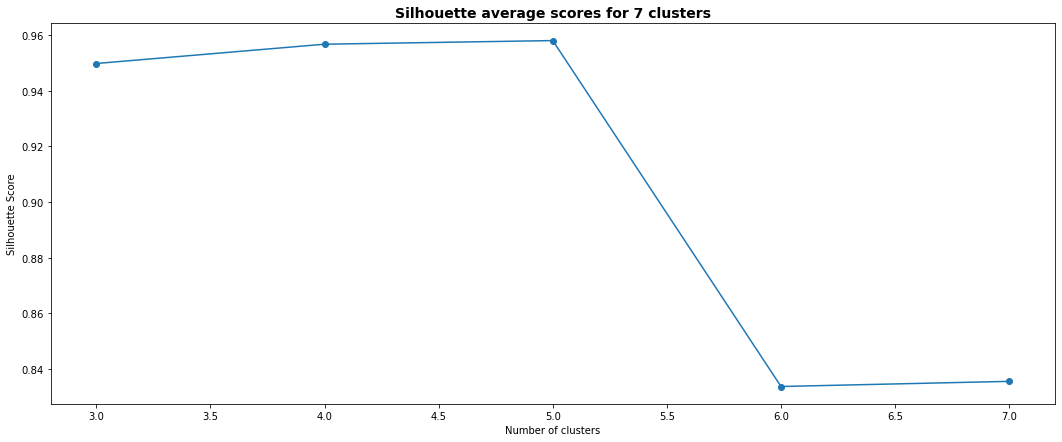

In [34]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(3,8) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(n_1)

    labels_pred = kmeans.predict(n_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(n_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(n_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

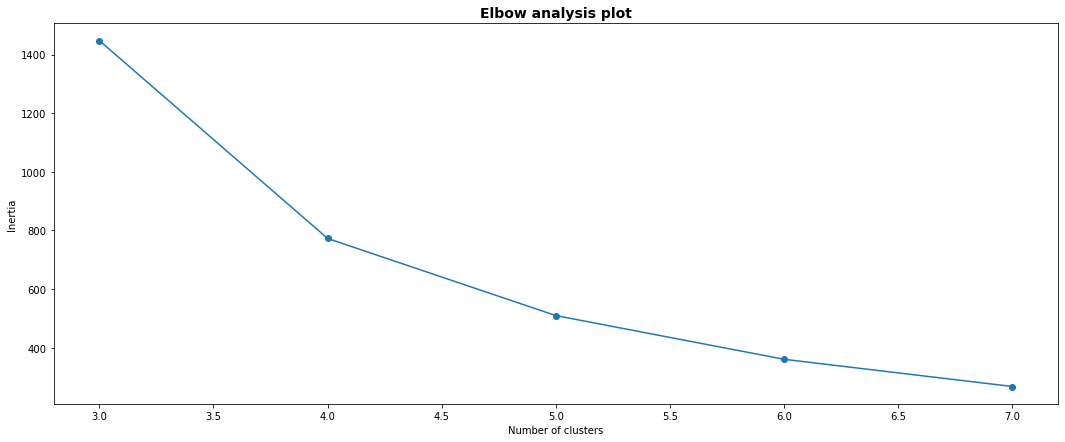

In [35]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [37]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=5, random_state=100).fit(n_1)
labels = kmeans.labels_
davies_bouldin_score(n_1, labels)

0.5474037933774516

In [38]:
metrics.calinski_harabasz_score(n_1, labels)

933398.3106160202

For 3 clusters the average silhouette_score is : 0.9340174296620508
For 4 clusters the average silhouette_score is : 0.9405819494378885
For 5 clusters the average silhouette_score is : 0.9440694374689981
For 6 clusters the average silhouette_score is : 0.8300467707458501
For 7 clusters the average silhouette_score is : 0.8319245170733564


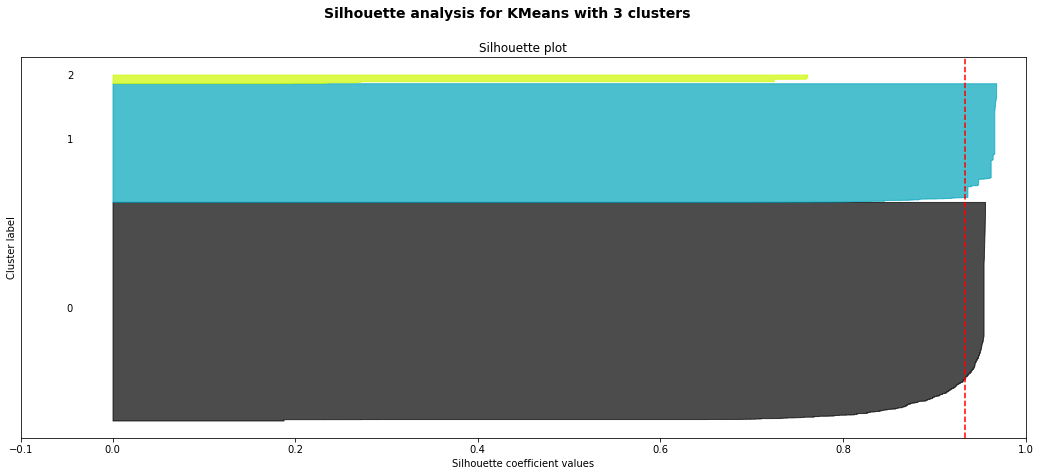

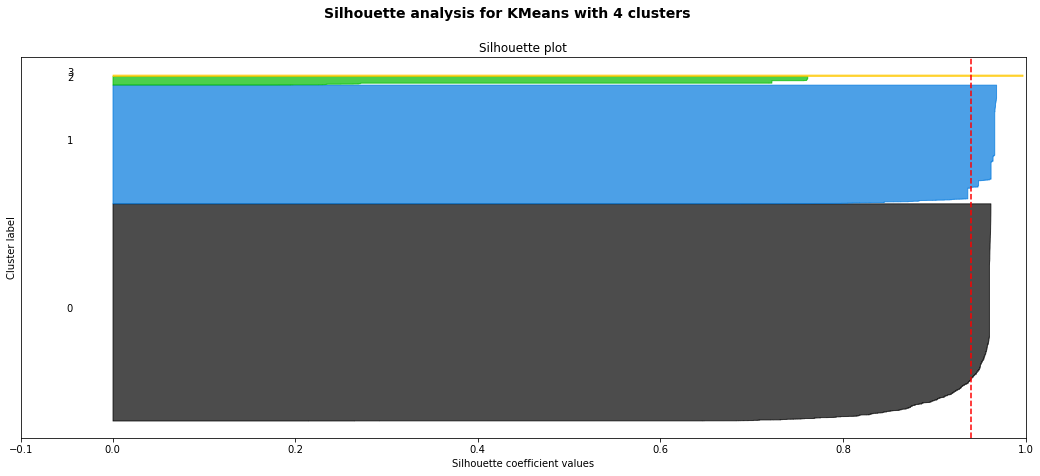

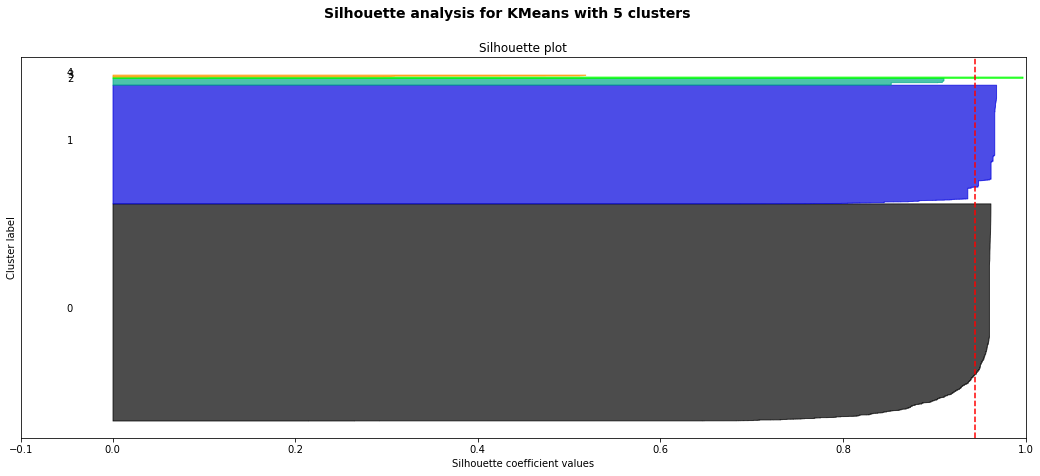

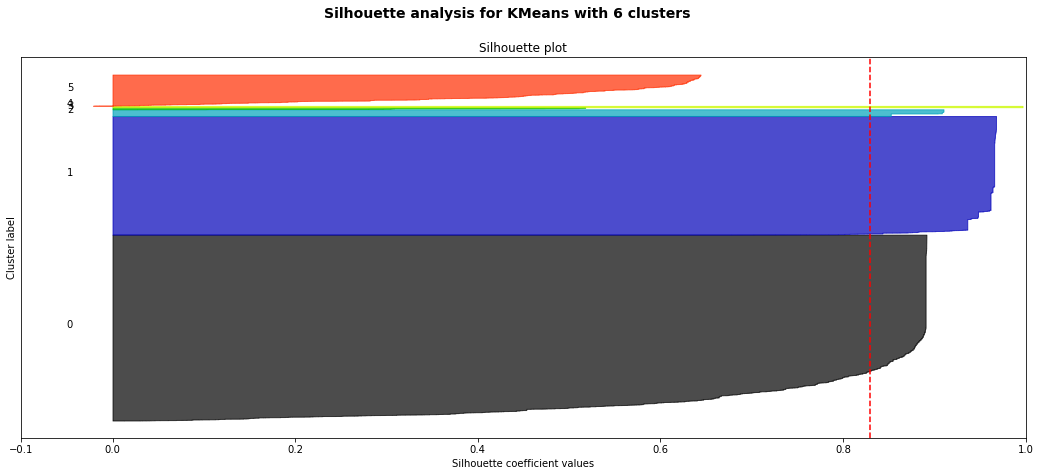

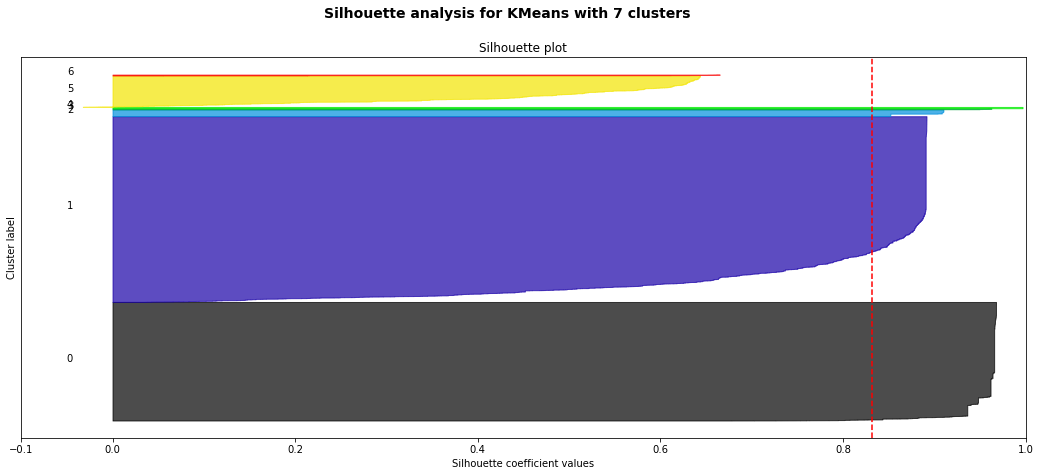

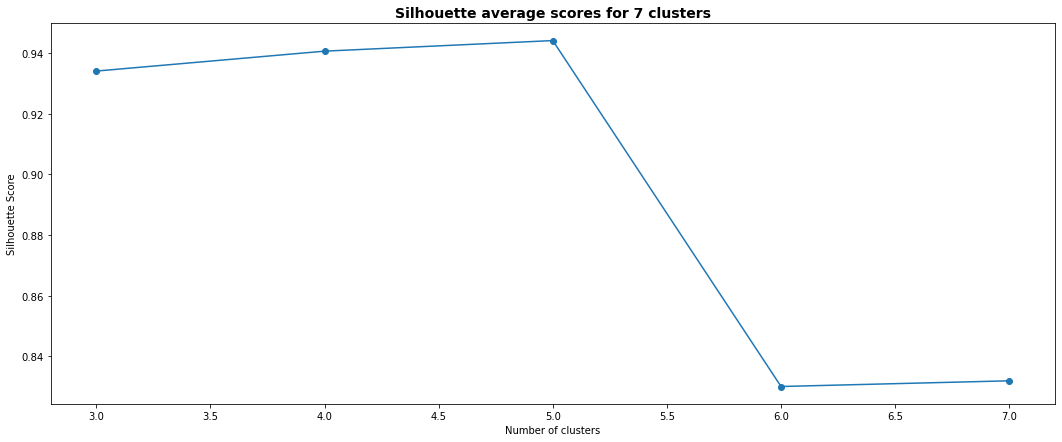

In [39]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(3,8) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(m_1)

    labels_pred = kmeans.predict(m_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(m_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(m_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

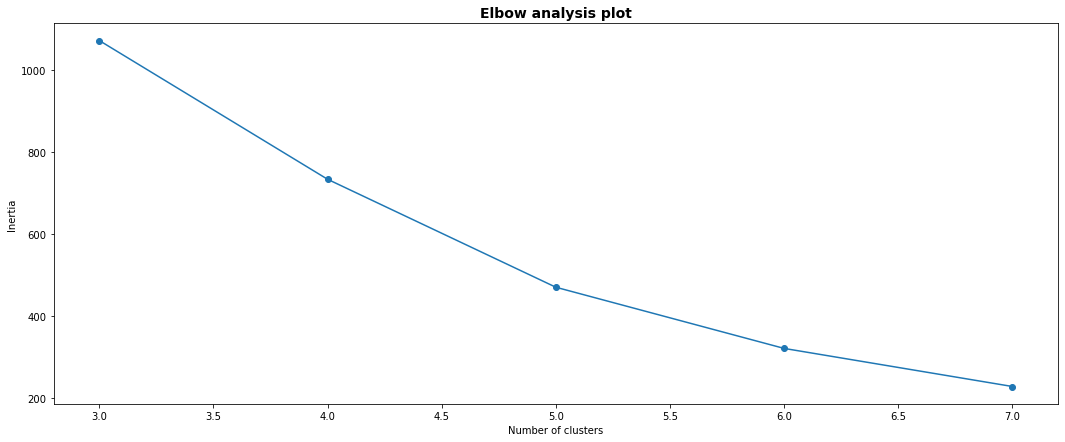

In [40]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [41]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=5, random_state=100).fit(m_1)
labels = kmeans.labels_
davies_bouldin_score(m_1, labels)

0.6125239578033703

In [42]:
metrics.calinski_harabasz_score(n_1, labels)

931390.1579348983

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(u,labels ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27432
           1       0.00      0.00      0.00        16
           2       0.98      0.77      0.87      1066
           3       0.00      0.00      0.00     14983
           4       0.00      0.00      0.00       173

    accuracy                           0.65     43670
   macro avg       0.40      0.35      0.37     43670
weighted avg       0.65      0.65      0.65     43670



In [55]:
cluster_model = KMeans(n_clusters=5, random_state=100)

In [56]:
cluster_model.fit(m_1)

KMeans(n_clusters=5, random_state=100)

In [57]:
cluster_model.labels_

array([0, 0, 0, ..., 0, 0, 1])

In [58]:
cluster_labels = cluster_model.fit_predict(m_1)

In [59]:
kmeans=m_1

In [60]:
kmeans['pred'] = cluster_labels

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(u.statuscode, cluster_model.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27432
           1       0.00      0.00      0.00        16
           2       0.98      0.77      0.87      1066
           3       0.00      0.00      0.00     14983
           4       0.00      0.00      0.00       173

    accuracy                           0.65     43670
   macro avg       0.40      0.35      0.37     43670
weighted avg       0.65      0.65      0.65     43670



In [69]:
df_filecaching = df[df['host'] == 13]

In [70]:
df_filecaching.head()

,statuscode,contenttype,protocol,osfamily,cachecontrol,uamajor,uafamily,devicefamily,contentpackage,coordinates,livechannel,devicemodel,devicebrand,host,method,assetnumber,cachename
2,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0
5,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0
9,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0
72,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0
201,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0


In [71]:
df_filecaching=df_filecaching.drop(labels=["contentpackage","livechannel","assetnumber"],axis=1)

In [72]:
df_filecaching=df_filecaching.drop(labels=["protocol","osfamily","cachecontrol", "devicemodel", "devicebrand", "host"],axis=1)

In [73]:
df_filecaching.head()

,statuscode,contenttype,uamajor,uafamily,devicefamily,coordinates,method,cachename
2,404,application/octet-stream,14.0,21.0,0.0,1.0,GET,0
5,404,application/octet-stream,14.0,21.0,0.0,1.0,GET,0
9,404,application/octet-stream,14.0,21.0,0.0,1.0,GET,0
72,404,application/octet-stream,14.0,21.0,0.0,1.0,GET,0
201,404,application/octet-stream,14.0,21.0,0.0,1.0,GET,0


In [74]:
df_filecaching=df_filecaching.drop(labels=["uamajor","devicefamily","cachename"],axis=1)

In [75]:
df_filecaching.head()

,statuscode,contenttype,uafamily,coordinates,method
2,404,application/octet-stream,21.0,1.0,GET
5,404,application/octet-stream,21.0,1.0,GET
9,404,application/octet-stream,21.0,1.0,GET
72,404,application/octet-stream,21.0,1.0,GET
201,404,application/octet-stream,21.0,1.0,GET


In [76]:
df_filecaching.isnull().sum()

statuscode     0
contenttype    0
uafamily       0
coordinates    0
method         0
dtype: int64

In [77]:
df_filecaching.contenttype.value_counts().sort_values()

text/html; charset=utf-8      41
application/java-archive    3050
application/octet-stream    8567
Name: contenttype, dtype: int64

In [78]:
df_filecaching.statuscode.value_counts().sort_values()

403        7
401        7
405       27
404    11617
Name: statuscode, dtype: int64

In [79]:
df_filecaching.uafamily.value_counts().sort_values()

81.0       1
1.0       13
47.0    3107
21.0    8537
Name: uafamily, dtype: int64

In [80]:
df_filecaching.method.value_counts().sort_values()

HEAD       27
GET     11631
Name: method, dtype: int64

In [81]:
df_filecaching.coordinates.value_counts().sort_values()

10795.0       1
3410.0        1
29.0          1
1474.0        1
2814.0        1
137.0         1
1208.0        3
502.0         3
639.0         4
238.0         4
394.0         6
10508.0       9
8613.0       13
3026.0       15
2180.0       43
658.0       236
3850.0      456
2832.0      601
0.0         915
444.0      1073
1.0        8271
Name: coordinates, dtype: int64

In [82]:
df_filecaching.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11658 entries, 2 to 286976
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   11658 non-null  int64  
 1   contenttype  11658 non-null  object 
 2   uafamily     11658 non-null  float64
 3   coordinates  11658 non-null  float64
 4   method       11658 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 546.5+ KB


In [83]:
p = df_filecaching.loc[:, df_filecaching.columns != "statuscode"]

In [84]:
o = df_filecaching.copy()

In [85]:
r = df_filecaching.iloc[:,:1]

In [86]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
r['statuscode']= le.fit_transform(r['statuscode'])

C:\Users\Ajinkya Waghulikar\AppData\Local\Temp/ipykernel_15440/515616491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['statuscode']= le.fit_transform(r['statuscode'])


In [89]:
o_1 = pd.get_dummies(o, columns = ['statuscode', 'contenttype', 'uafamily', 'method'])
print(o_1)

        coordinates  statuscode_401  statuscode_403  statuscode_404  \
2               1.0               0               0               1   
5               1.0               0               0               1   
9               1.0               0               0               1   
72              1.0               0               0               1   
201             1.0               0               0               1   
...             ...             ...             ...             ...   
286776          1.0               0               0               1   
286920          1.0               0               0               1   
286940          1.0               0               0               1   
286972          1.0               0               0               1   
286976          1.0               0               0               1   

        statuscode_405  contenttype_application/java-archive  \
2                    0                                     0   
5                  

In [90]:
p_1 = pd.get_dummies(p, columns = ['contenttype', 'uafamily', 'method'])
print(p_1)

        coordinates  contenttype_application/java-archive  \
2               1.0                                     0   
5               1.0                                     0   
9               1.0                                     0   
72              1.0                                     0   
201             1.0                                     0   
...             ...                                   ...   
286776          1.0                                     0   
286920          1.0                                     0   
286940          1.0                                     0   
286972          1.0                                     0   
286976          1.0                                     0   

        contenttype_application/octet-stream  \
2                                          1   
5                                          1   
9                                          1   
72                                         1   
201                        

In [91]:
cols = p_1.columns

In [92]:
cols1 = o_1.columns

In [93]:
p_1 = ms.fit_transform(p_1)

In [94]:
o_1 = ms.fit_transform(o_1)

In [95]:
p_1 = pd.DataFrame(p_1, columns=[cols])

In [96]:
o_1 = pd.DataFrame(o_1, columns=[cols1])

For 3 clusters the average silhouette_score is : 0.9749367043030693
For 4 clusters the average silhouette_score is : 0.9714458642792085
For 5 clusters the average silhouette_score is : 0.966804185717093
For 6 clusters the average silhouette_score is : 0.9681032448017433
For 7 clusters the average silhouette_score is : 0.9682383779252605


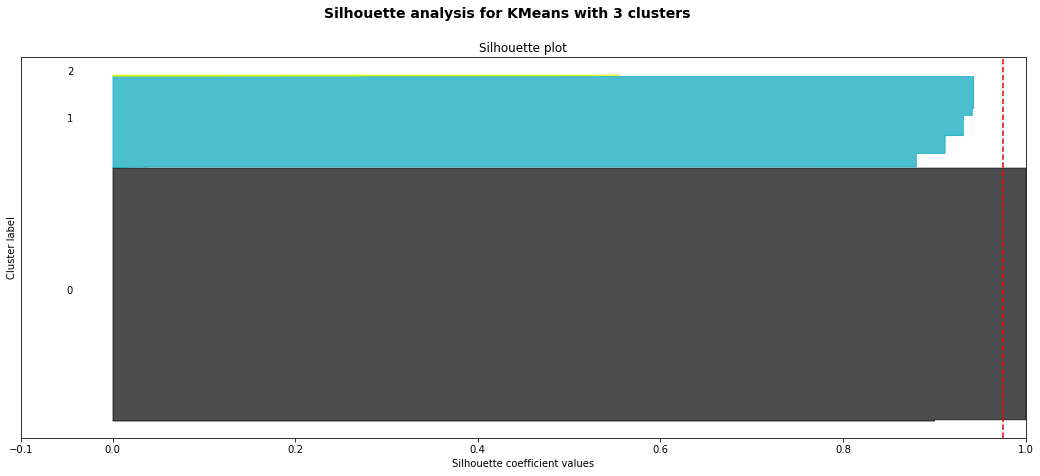

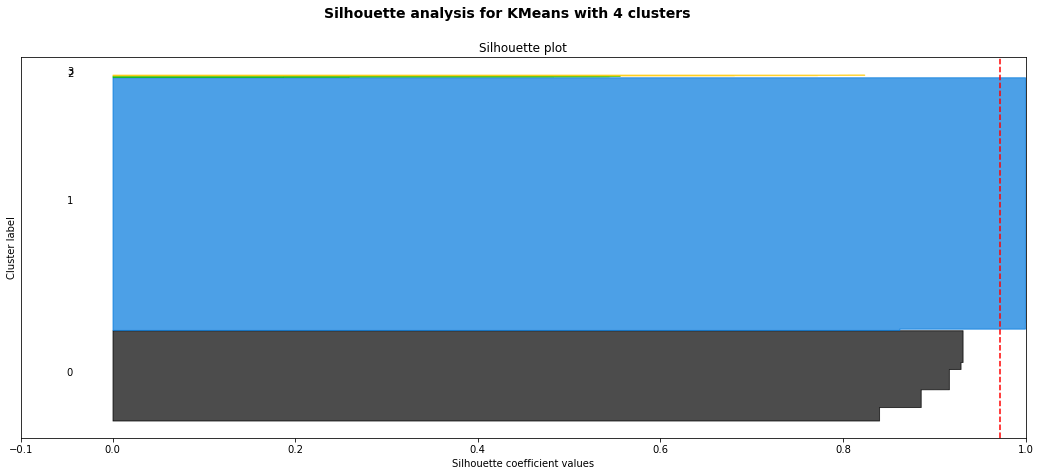

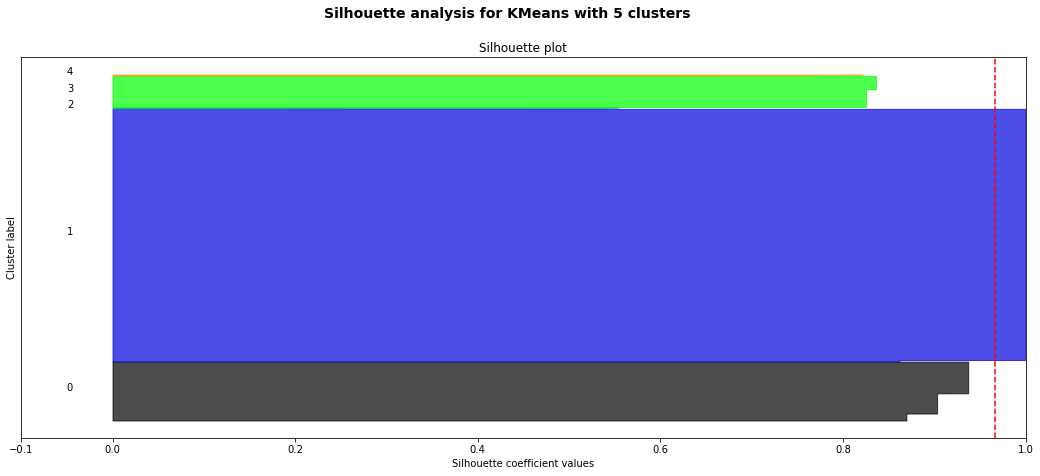

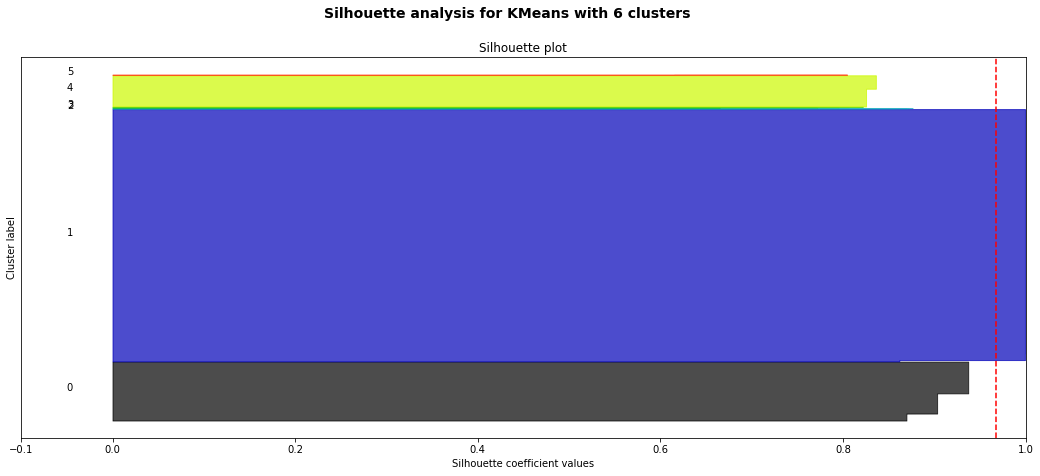

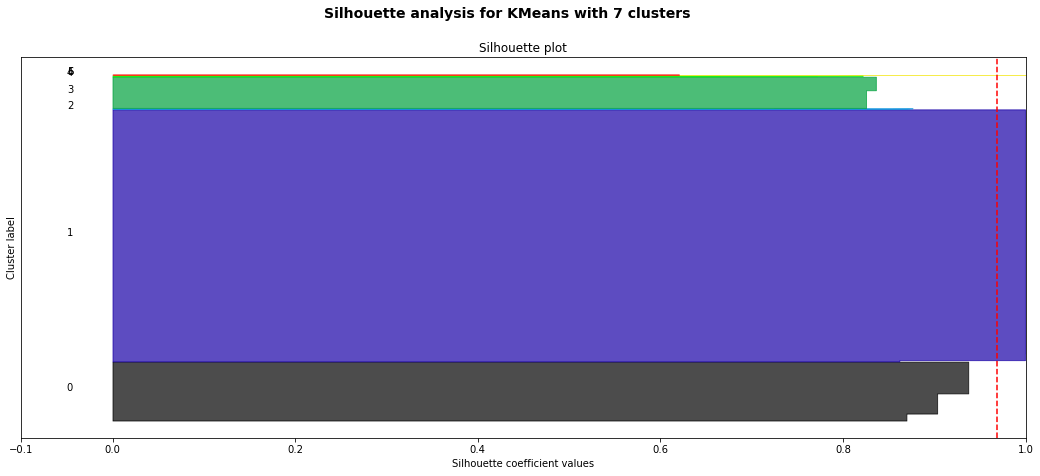

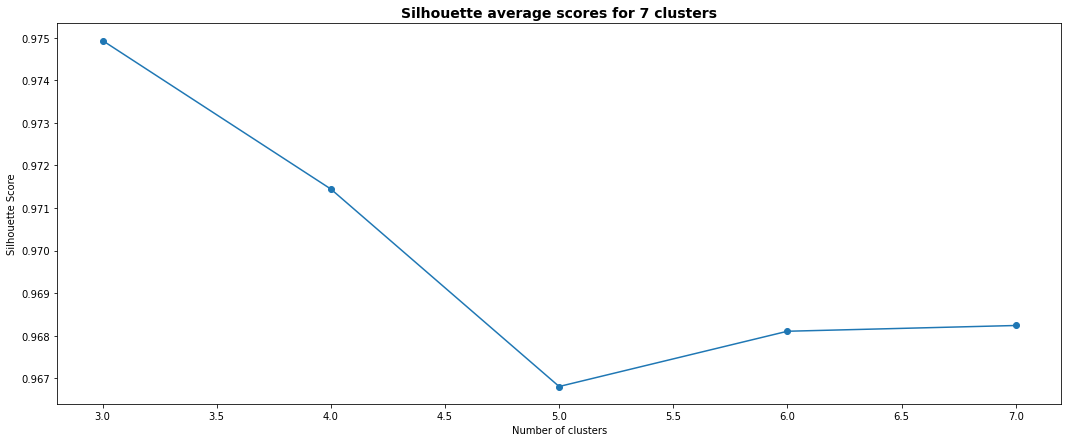

In [97]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(3,8) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(p_1)

    labels_pred = kmeans.predict(p_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(p_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(p_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

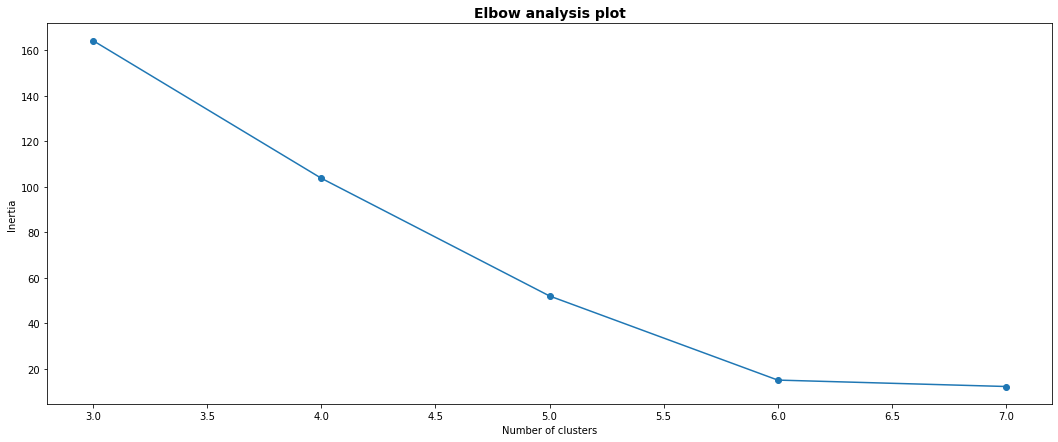

In [98]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [99]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=6, random_state=100).fit(p_1)
labels = kmeans.labels_
davies_bouldin_score(p_1, labels)

0.3142314352791969

In [100]:
metrics.calinski_harabasz_score(p_1, labels)

1435699.749680112

For 3 clusters the average silhouette_score is : 0.9749207257203141
For 4 clusters the average silhouette_score is : 0.9538714578528945
For 5 clusters the average silhouette_score is : 0.9667961223907617
For 6 clusters the average silhouette_score is : 0.9679641175803371
For 7 clusters the average silhouette_score is : 0.9680660220687717


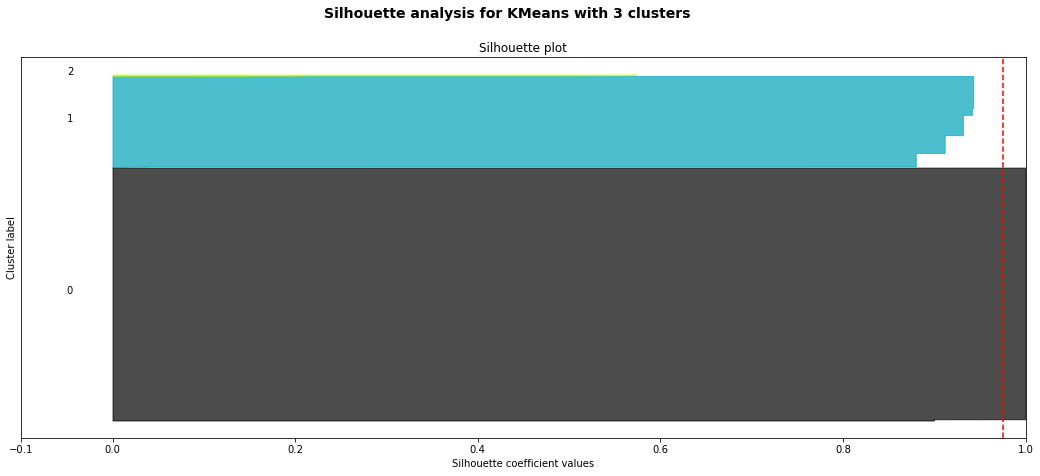

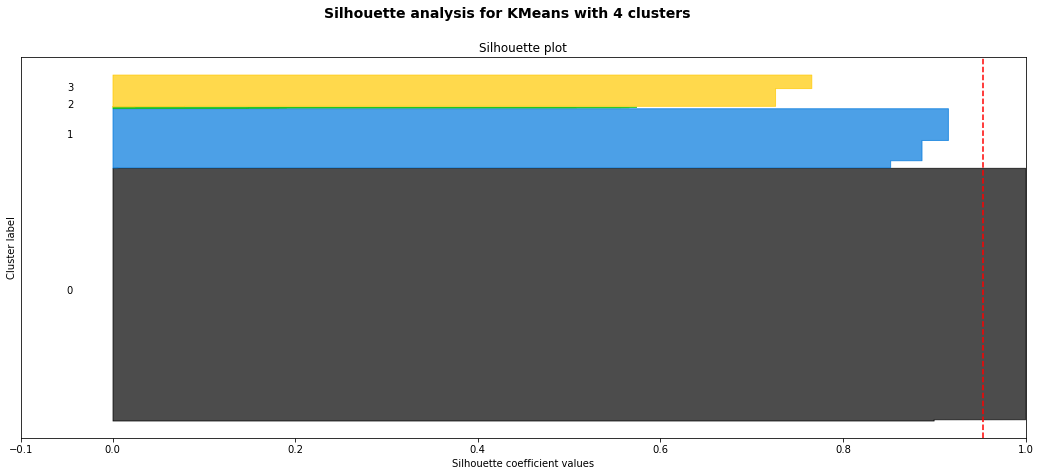

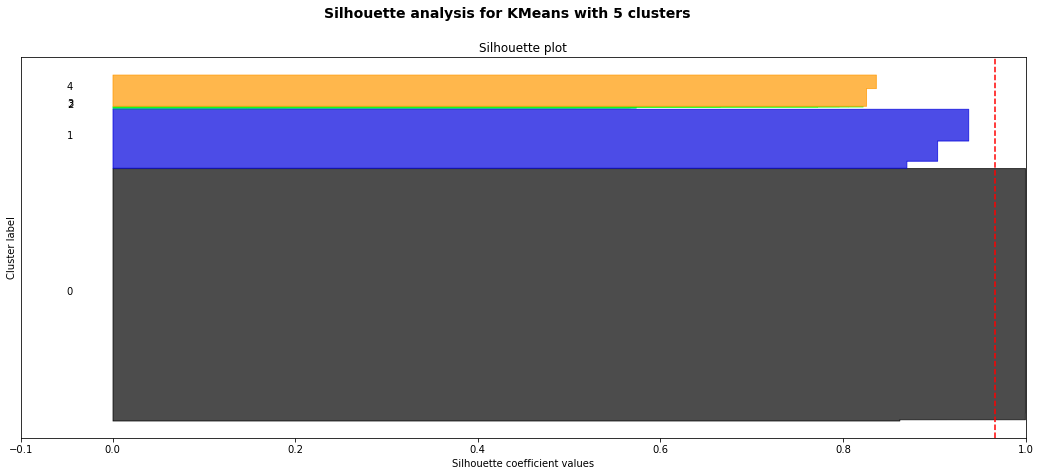

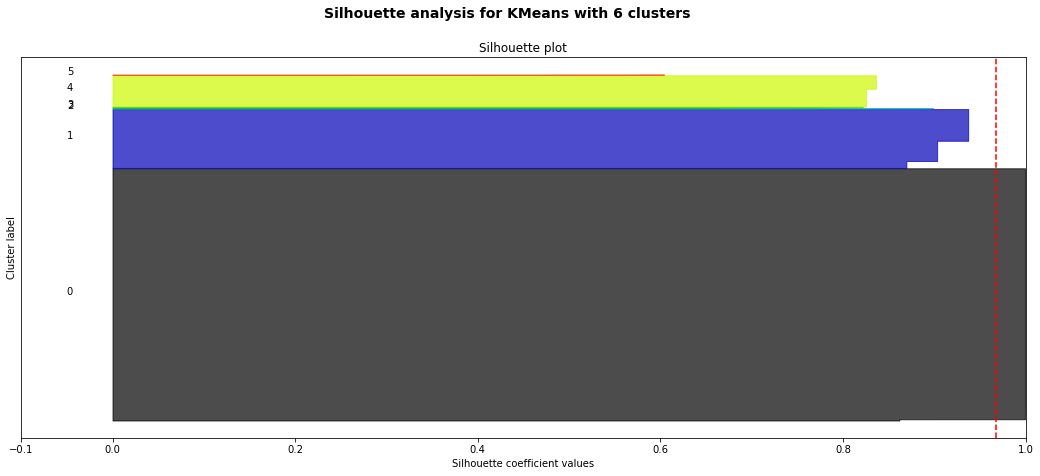

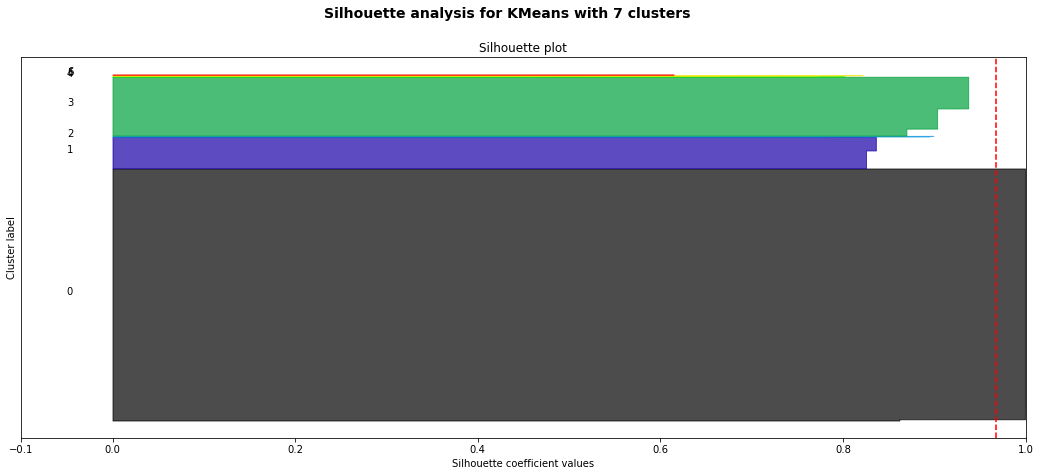

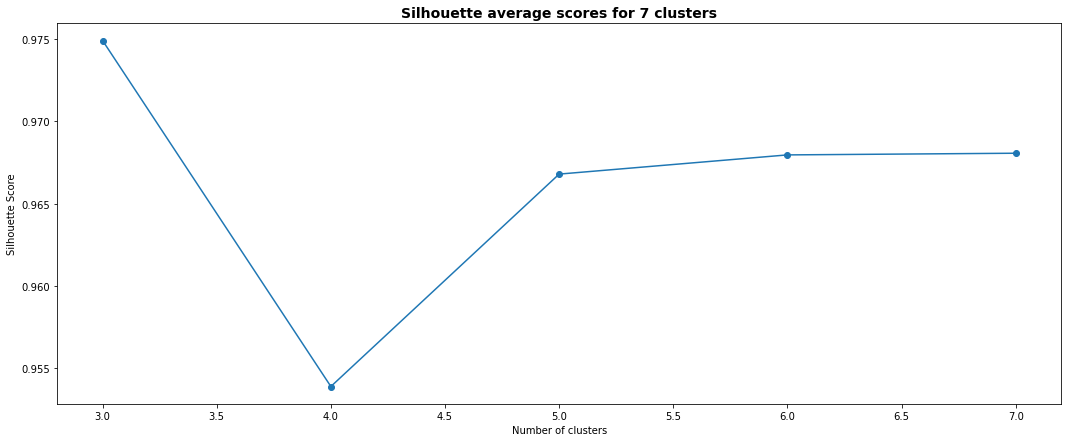

In [101]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(3,8) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(o_1)

    labels_pred = kmeans.predict(o_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(o_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(o_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

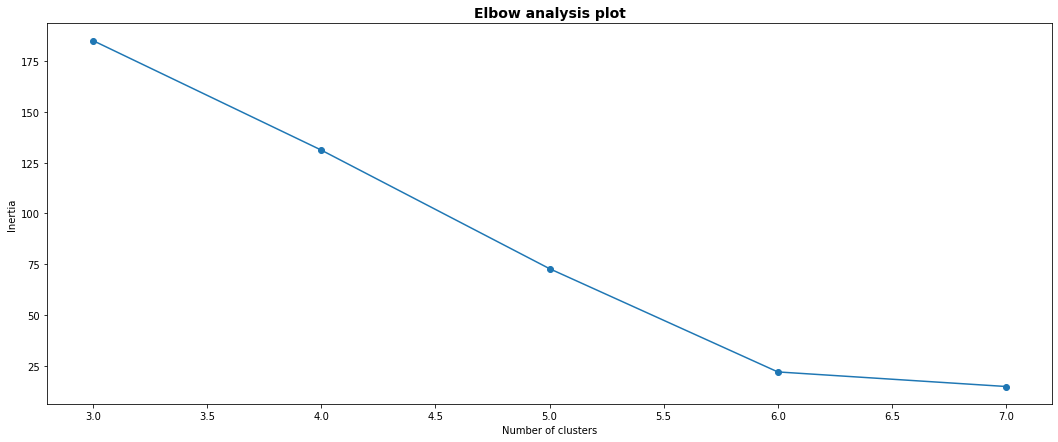

In [102]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [103]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=6, random_state=100).fit(o_1)
labels = kmeans.labels_
davies_bouldin_score(o_1, labels)

0.4335028594595453

In [104]:
metrics.calinski_harabasz_score(o_1, labels)

988417.0185359385

In [106]:
print(classification_report(r,labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         7
           2       1.00      0.09      0.17     11617
           3       1.00      1.00      1.00        27
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.09     11658
   macro avg       0.33      0.18      0.19     11658
weighted avg       1.00      0.09      0.17     11658



C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
df_website = df[df['host'] == 3]

In [108]:
df_website.head()

,statuscode,contenttype,protocol,osfamily,cachecontrol,uamajor,uafamily,devicefamily,contentpackage,coordinates,livechannel,devicemodel,devicebrand,host,method,assetnumber,cachename
76,403,text/html,HTTP/1.1,1.0,Cache-Control:max-age=60,2.0,20.0,73.0,NaN,1.0,NaN,74.0,7.0,3.0,GET,NaN,0
623,403,text/html,HTTP/1.1,3.0,Cache-Control:max-age=60,15.0,11.0,2.0,NaN,0.0,NaN,1.0,1.0,3.0,GET,NaN,0
730,403,text/html,HTTP/1.1,2.0,Cache-Control:max-age=60,7.0,7.0,0.0,NaN,3910.0,NaN,NaN,NaN,3.0,GET,NaN,0
743,403,text/html,HTTP/1.1,1.0,Cache-Control:max-age=60,NaN,1.0,73.0,NaN,1.0,NaN,74.0,7.0,3.0,GET,NaN,0
757,403,text/html,HTTP/1.1,5.0,Cache-Control:max-age=60,14.0,30.0,161.0,NaN,193.0,NaN,163.0,15.0,3.0,GET,NaN,0


In [109]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 76 to 286903
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   statuscode      1660 non-null   int64  
 1   contenttype     1660 non-null   object 
 2   protocol        1660 non-null   object 
 3   osfamily        1660 non-null   float64
 4   cachecontrol    1660 non-null   object 
 5   uamajor         1377 non-null   float64
 6   uafamily        1660 non-null   float64
 7   devicefamily    1660 non-null   float64
 8   contentpackage  0 non-null      float64
 9   coordinates     1631 non-null   float64
 10  livechannel     0 non-null      float64
 11  devicemodel     1477 non-null   float64
 12  devicebrand     1477 non-null   float64
 13  host            1660 non-null   float64
 14  method          1660 non-null   object 
 15  assetnumber     0 non-null      float64
 16  cachename       1660 non-null   int64  
dtypes: float64(11), int64(2), obje

In [110]:
df_website=df_website.drop(labels=["contentpackage","livechannel","assetnumber"],axis=1)

In [111]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 76 to 286903
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   statuscode    1660 non-null   int64  
 1   contenttype   1660 non-null   object 
 2   protocol      1660 non-null   object 
 3   osfamily      1660 non-null   float64
 4   cachecontrol  1660 non-null   object 
 5   uamajor       1377 non-null   float64
 6   uafamily      1660 non-null   float64
 7   devicefamily  1660 non-null   float64
 8   coordinates   1631 non-null   float64
 9   devicemodel   1477 non-null   float64
 10  devicebrand   1477 non-null   float64
 11  host          1660 non-null   float64
 12  method        1660 non-null   object 
 13  cachename     1660 non-null   int64  
dtypes: float64(8), int64(2), object(4)
memory usage: 194.5+ KB


In [112]:
df_website=df_website.drop(labels=["protocol","osfamily","cachecontrol"],axis=1)

In [113]:
df_website=df_website.drop(labels=["devicefamily","devicemodel","devicebrand"],axis=1)

In [114]:
df_website=df_website.drop(labels=["host","method","cachename"],axis=1)

In [115]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 76 to 286903
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   1660 non-null   int64  
 1   contenttype  1660 non-null   object 
 2   uamajor      1377 non-null   float64
 3   uafamily     1660 non-null   float64
 4   coordinates  1631 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 77.8+ KB


In [116]:
df_website.statuscode.value_counts().sort_values()

405      61
403    1599
Name: statuscode, dtype: int64

In [117]:
df_website.contenttype.value_counts().sort_values()

text/html; charset=utf-8      61
text/html                   1599
Name: contenttype, dtype: int64

In [118]:
df_website.uamajor.value_counts().sort_values()

105.0      1
106.0      1
118.0      1
34.0       1
24.0       1
8.0        1
68.0       1
31.0       1
81.0       1
95.0       1
41.0       1
67.0       1
12.0       2
0.0        2
109.0      2
9.0        3
97.0       3
58.0       3
42.0       3
22.0       4
141.0      4
113.0      4
126.0      4
29.0       5
6.0        6
21.0       6
1.0        6
44.0       8
39.0      11
38.0      14
20.0      23
4.0       28
28.0      30
64.0      31
10.0      34
26.0      36
17.0      38
18.0      60
19.0      66
7.0       68
2.0       68
45.0      85
15.0     272
14.0     436
Name: uamajor, dtype: int64

In [119]:
df_website.uafamily.value_counts().sort_values()

42.0      2
29.0      2
63.0      2
99.0      3
67.0      6
15.0      8
33.0     12
23.0     12
8.0      13
16.0     14
28.0     15
20.0     18
14.0     32
0.0      34
44.0     35
19.0     48
3.0      56
7.0      61
22.0     66
31.0     89
2.0      98
1.0     267
11.0    331
30.0    436
Name: uafamily, dtype: int64

In [120]:
df_website.coordinates.value_counts().sort_values()

458.0      1
17.0       1
517.0      1
169.0      1
496.0      1
        ... 
152.0     24
225.0     24
26.0      33
0.0      311
1.0      593
Name: coordinates, Length: 243, dtype: int64

In [121]:
df_website['uamajor']=df_website['uamajor'].fillna(df_website['uamajor'].mode()[0])
df_website['coordinates']=df_website['coordinates'].fillna(df_website['coordinates'].mode()[0])

In [122]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 76 to 286903
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   1660 non-null   int64  
 1   contenttype  1660 non-null   object 
 2   uamajor      1660 non-null   float64
 3   uafamily     1660 non-null   float64
 4   coordinates  1660 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 77.8+ KB


In [123]:
f = df_website.loc[:, df_website.columns != "statuscode"]

In [124]:
g = df_website.copy()

In [125]:
h = df_website.iloc[:,:1]

In [126]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
h['statuscode']= le.fit_transform(h['statuscode'])

C:\Users\Ajinkya Waghulikar\AppData\Local\Temp/ipykernel_15440/3790923286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h['statuscode']= le.fit_transform(h['statuscode'])


In [128]:
g_1 = pd.get_dummies(g, columns = ['statuscode', 'contenttype', 'uafamily', 'uamajor'])
print(g_1)

        coordinates  statuscode_403  statuscode_405  contenttype_text/html  \
76              1.0               1               0                      1   
623             0.0               1               0                      1   
730          3910.0               1               0                      1   
743             1.0               1               0                      1   
757           193.0               1               0                      1   
...             ...             ...             ...                    ...   
286076        996.0               1               0                      1   
286141          1.0               1               0                      1   
286557          1.0               1               0                      1   
286567       3848.0               0               1                      0   
286903          1.0               1               0                      1   

        contenttype_text/html; charset=utf-8  uafamily_0.0  uaf

In [129]:
f_1 = pd.get_dummies(f, columns = ['contenttype', 'uafamily', 'uamajor'])
print(f_1)

        coordinates  contenttype_text/html  \
76              1.0                      1   
623             0.0                      1   
730          3910.0                      1   
743             1.0                      1   
757           193.0                      1   
...             ...                    ...   
286076        996.0                      1   
286141          1.0                      1   
286557          1.0                      1   
286567       3848.0                      0   
286903          1.0                      1   

        contenttype_text/html; charset=utf-8  uafamily_0.0  uafamily_1.0  \
76                                         0             0             0   
623                                        0             0             0   
730                                        0             0             0   
743                                        0             0             1   
757                                        0             0         

In [130]:
cols = f_1.columns

In [131]:
cols1 = g_1.columns

In [132]:
f_1 = ms.fit_transform(f_1)

In [133]:
g_1 = ms.fit_transform(g_1)

In [134]:
f_1 = pd.DataFrame(f_1, columns=[cols])

In [135]:
g_1 = pd.DataFrame(g_1, columns=[cols1])

For 3 clusters the average silhouette_score is : 0.4440110434790768
For 4 clusters the average silhouette_score is : 0.5734091135140938
For 5 clusters the average silhouette_score is : 0.6167951254951496
For 6 clusters the average silhouette_score is : 0.6506731000141329
For 7 clusters the average silhouette_score is : 0.6614207542965598


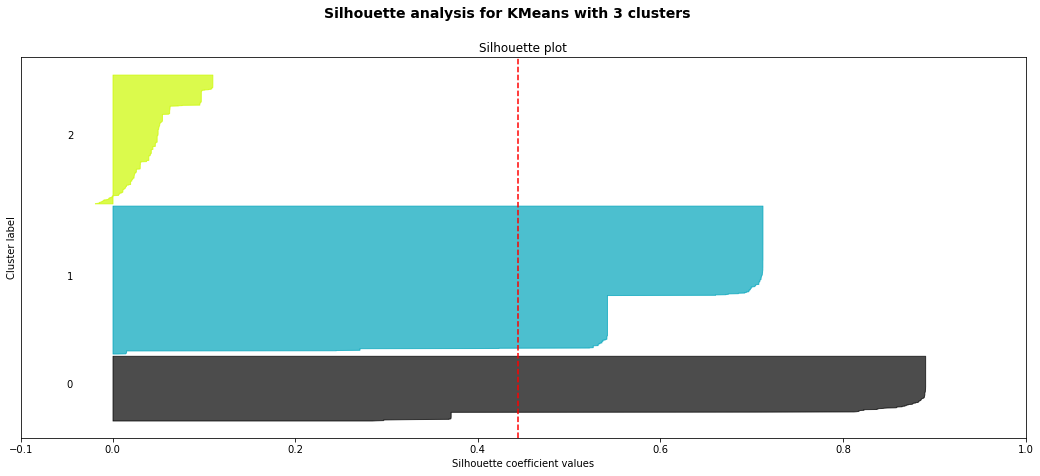

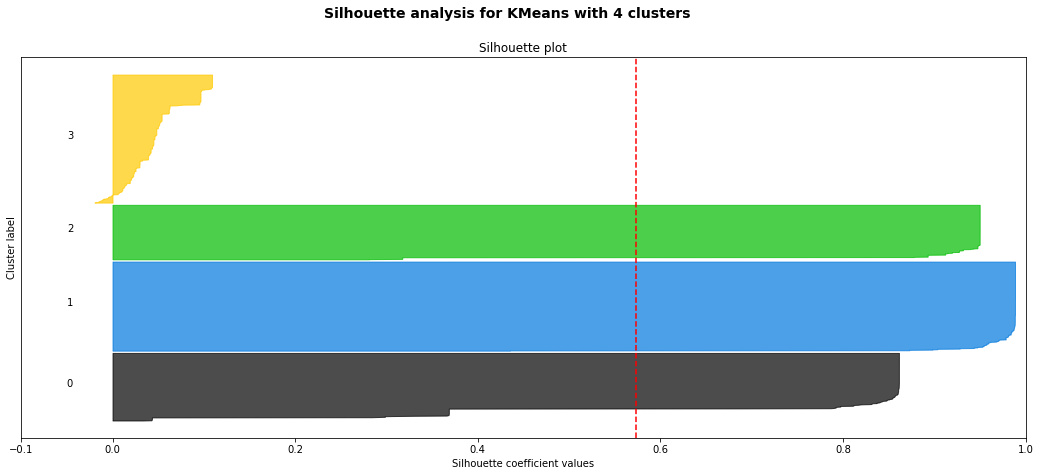

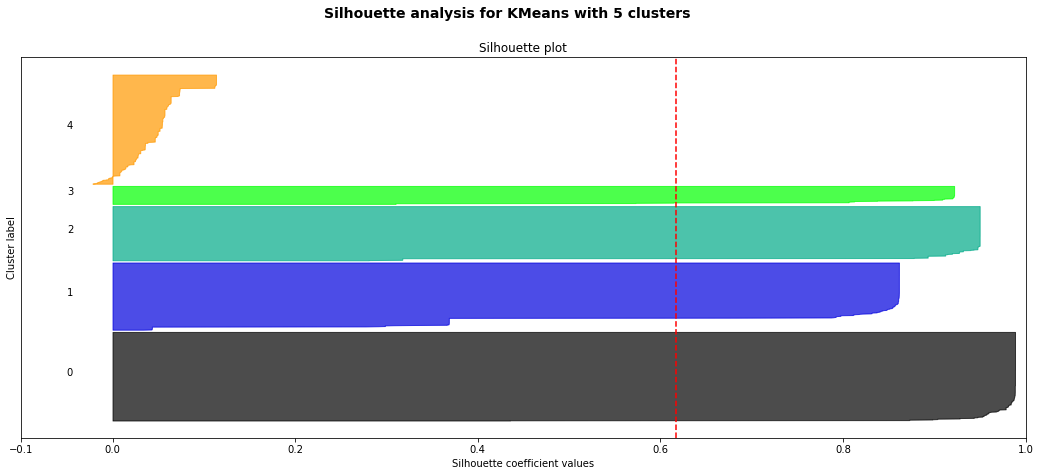

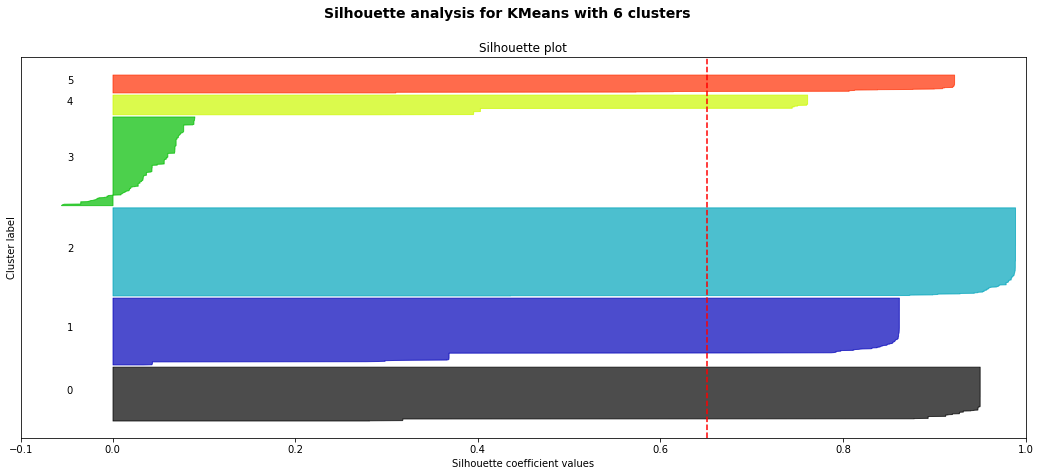

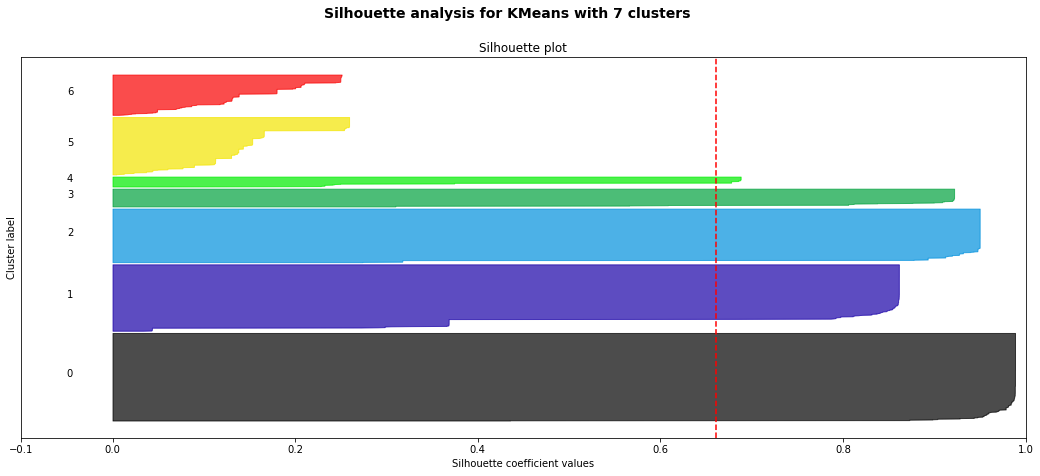

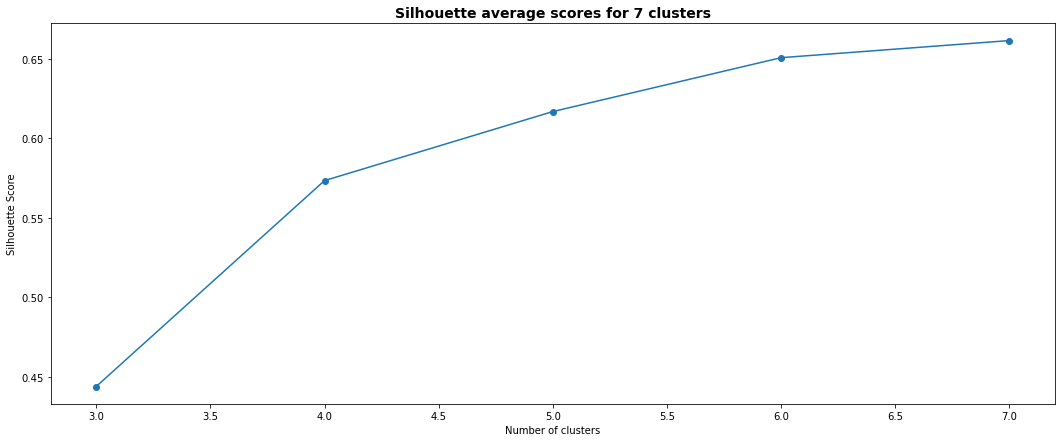

In [136]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(3,8) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(f_1)

    labels_pred = kmeans.predict(f_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(f_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(f_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

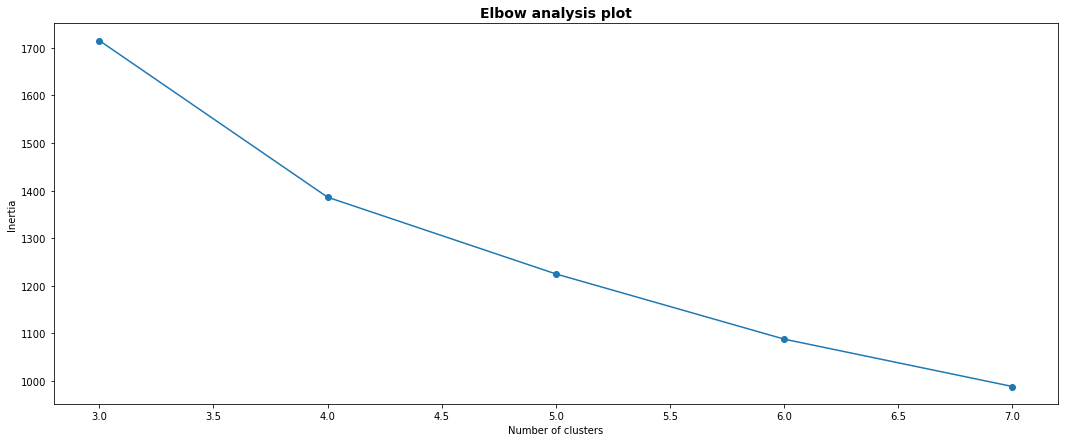

In [137]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [148]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=5, random_state=100).fit(f_1)
labels = kmeans.labels_
davies_bouldin_score(f_1, labels)

1.1526379122958659

In [149]:
metrics.calinski_harabasz_score(f_1, labels)

546.5725096951676

For 2 clusters the average silhouette_score is : 0.3327919129554015
For 3 clusters the average silhouette_score is : 0.4367959363859461
For 4 clusters the average silhouette_score is : 0.564973887946071
For 5 clusters the average silhouette_score is : 0.60172852676522
For 6 clusters the average silhouette_score is : 0.6448326797326644
For 7 clusters the average silhouette_score is : 0.6782933662568286


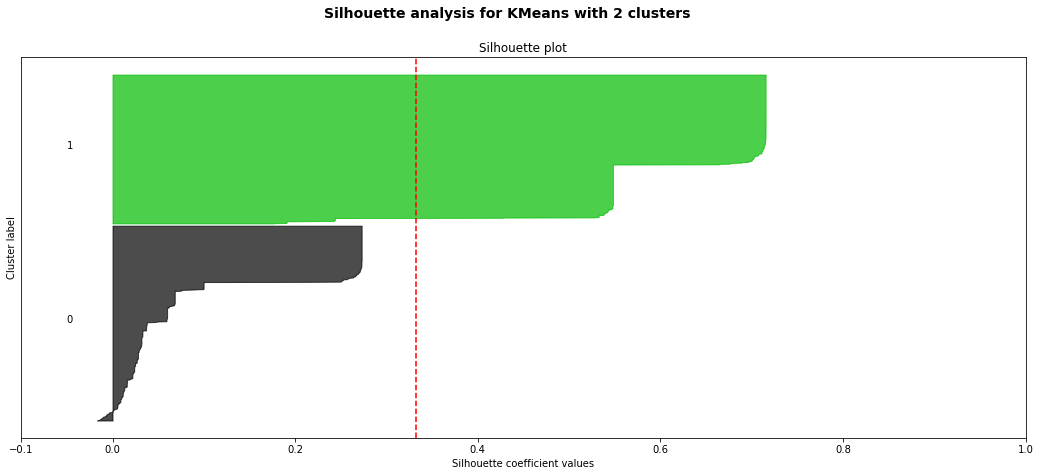

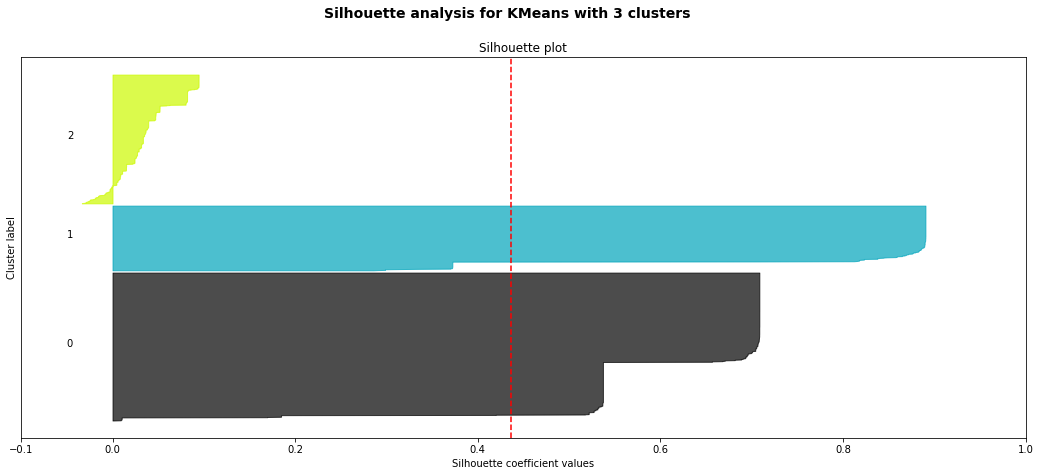

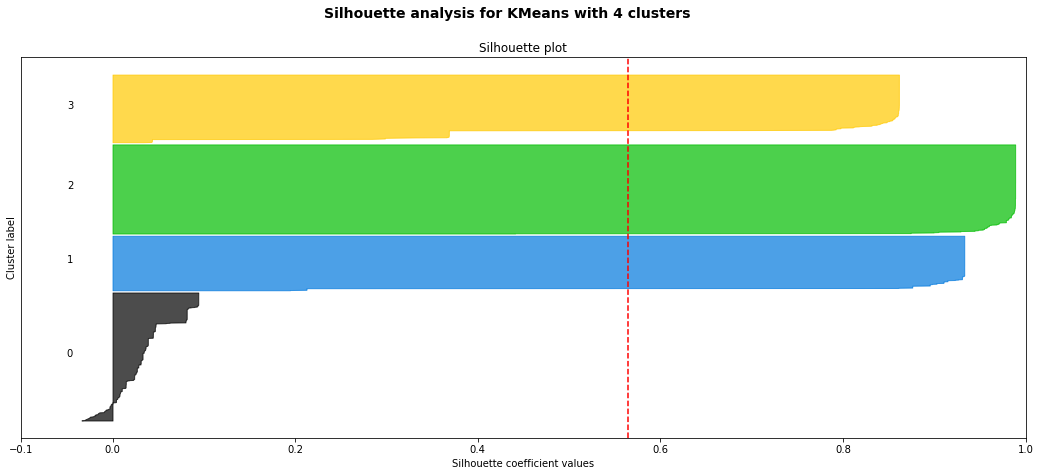

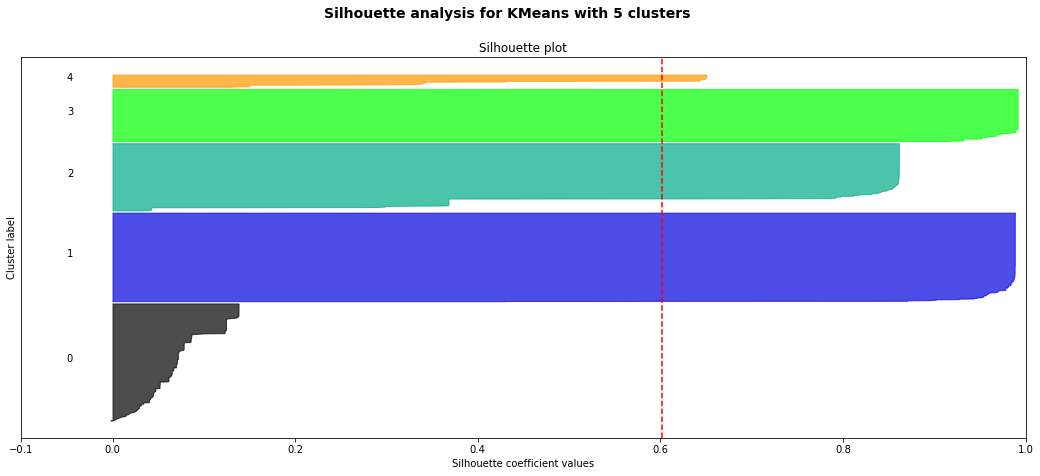

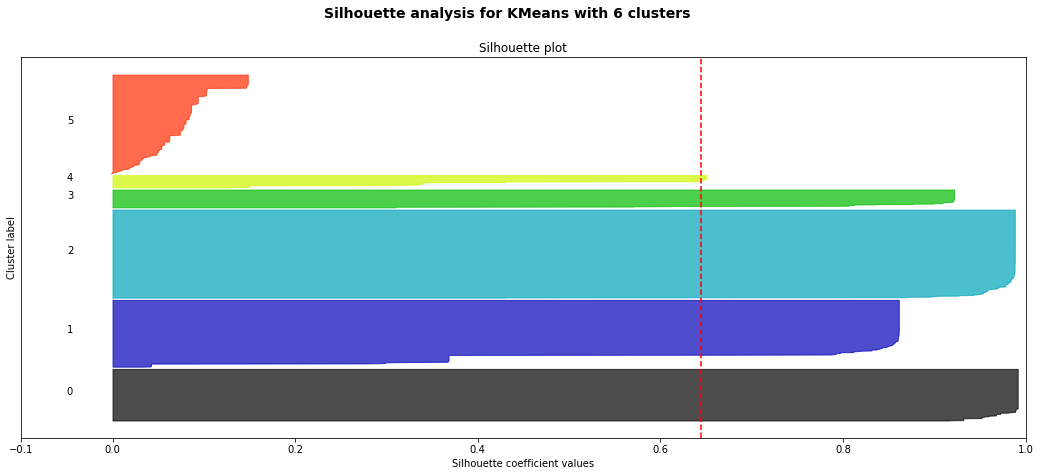

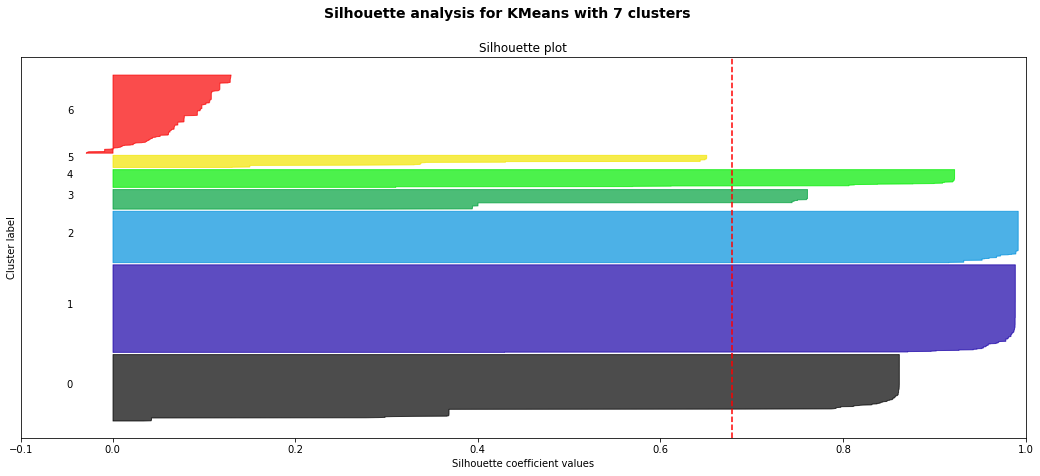

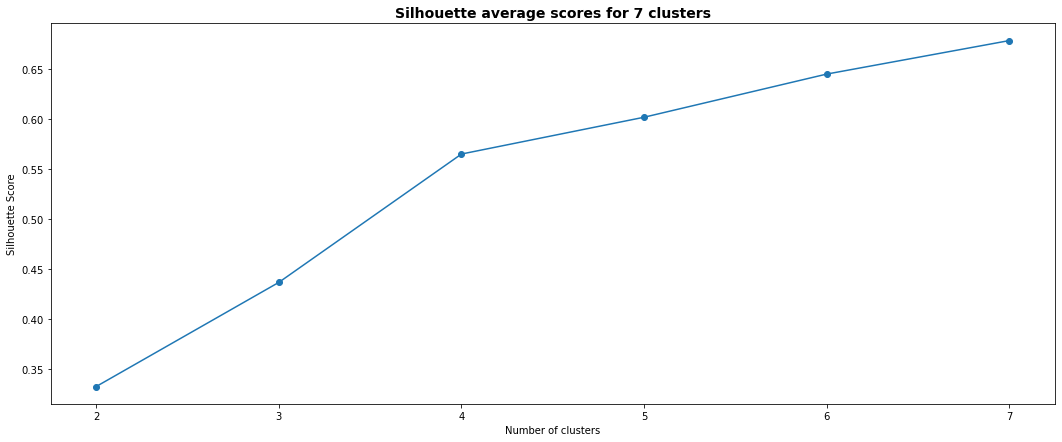

In [190]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(2,8) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(g_1)

    labels_pred = kmeans.predict(g_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(g_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(g_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

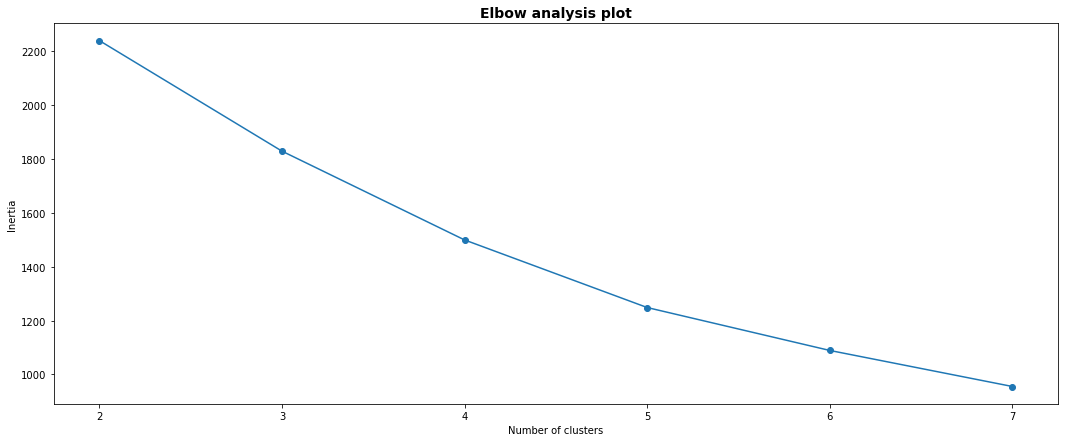

In [191]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [156]:
kmeans = KMeans(n_clusters=6, random_state=100).fit(g_1)
labels = kmeans.labels_
davies_bouldin_score(g_1, labels)

1.0962717535966386

In [157]:
metrics.calinski_harabasz_score(g_1, labels)

568.4670585211571

In [158]:
print(classification_report(h,labels))

              precision    recall  f1-score   support

           0       1.00      0.16      0.28      1599
           1       0.00      0.00      0.00        61
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.15      1660
   macro avg       0.17      0.03      0.05      1660
weighted avg       0.96      0.15      0.27      1660



C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [160]:
import seaborn as sns

In [162]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [163]:
from kmodes.kmodes import KModes

In [164]:
cost = []
for num_clusters in list(range(1,9)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(g_1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4602.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4343.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 109, cost: 3642.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 102, cost: 3383.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 80, cost: 3153.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 68, cost: 2986.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 56, cost: 2839.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration:

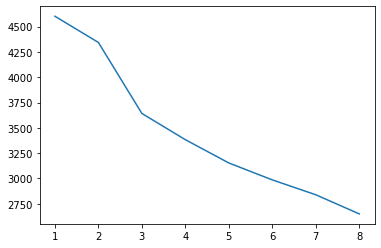

In [166]:
y = np.array([i for i in range(1,9,1)])
plt.plot(y,cost)

In [167]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(g_1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 109, cost: 3642.0


In [168]:
fitClusters_cao

array([0, 2, 0, ..., 0, 1, 0], dtype=uint16)

In [170]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1).fit(g_1)
labels = km_cao.labels_
davies_bouldin_score(g_1, labels)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 109, cost: 3642.0


0.999899949143208

In [171]:
metrics.calinski_harabasz_score(g_1, labels)

324.59138483428677

In [172]:
print(classification_report(h,labels))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90      1599
           1       1.00      0.97      0.98        61
           2       0.00      0.00      0.00         0

    accuracy                           0.82      1660
   macro avg       0.67      0.59      0.63      1660
weighted avg       1.00      0.82      0.90      1660



C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [178]:
cost = []
for num_clusters in list(range(3,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(o_1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 28, cost: 2449.0
Run 1, iteration: 2/100, moves: 4, cost: 2449.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2375.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2370.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2301.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2289.0


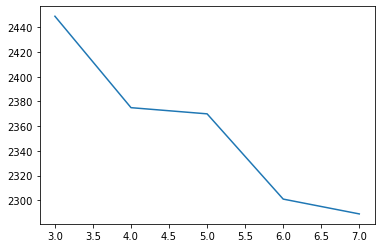

In [179]:
y = np.array([i for i in range(3,8,1)])
plt.plot(y,cost)

In [180]:
cost = []
for num_clusters in list(range(3,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(n_1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 30159.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 29320.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 29314.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 29278.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 29270.0


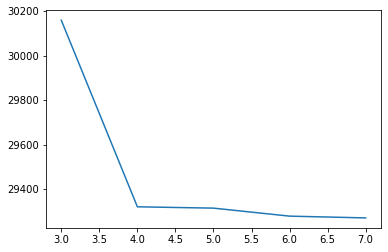

In [181]:
y = np.array([i for i in range(3,8,1)])
plt.plot(y,cost)

In [185]:
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1).fit(o_1)
labels = km_cao.labels_
davies_bouldin_score(r, labels)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2375.0


0.3

In [187]:
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1).fit(n_1)
labels = km_cao.labels_
davies_bouldin_score(u, labels)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 29320.0


0.021752231590146748